In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv(r'C:\Users\Eli Brignac\OneDrive\Desktop\Hydrogen\MACH-2-Hydrogen-Hub\comma_fixed.csv')
df.shape

(140, 4)

In [19]:
df = pd.read_excel(r'C:\Users\Eli Brignac\OneDrive\Desktop\Hydrogen\given_files\Parsed_Data.xlsx')
df = df.replace('\n', '', regex=True)
df = df.replace('_x000D_', '', regex=True)
df = df.replace('•', ' ', regex=True)
df = df.replace('°', ' ', regex=True)
df = df.replace('_x0002_', ' ', regex=True)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Eli Brignac\\OneDrive\\Desktop\\Hydrogen\\given_files\\Parsed_Data.xlsx'

In [ ]:
df

,Unique ID,Value Chain,Technology,Core Occupation,Unique Requirements for Hydrogen
0,2001,Production,Plant Operation,Automation & controls specialist,"Hydrogen properties, behaviour and potential h..."
1,2001,Production,Plant Operation,Automation & controls specialist,Safety when working with or around hydrogen
2,2001,Production,Plant Operation,Automation & controls specialist,Knowledge of automated process systems and con...
3,2001,Production,Plant Operation,Chemical/Process engineer,"Hydrogen properties, behaviour and potential h..."
4,2001,Production,Plant Operation,Chemical/Process engineer,Safety when working with or around hydrogen
...,...,...,...,...,...
436,5004,Support,Inspection,Welding inspector,Safety when working with oraround hydrogen
437,5004,Support,Inspection,Welding inspector,Welding procedures andtechniques appropriate f...
438,5004,Support,Inspection,Welding inspector,Assess strength and integrity ofwelds to withs...
439,5004,Support,Inspection,Welding inspector,"Knowledge of hydrogen relatedregulations, stan..."


In [21]:
counts = df['unique_requirements_for_hydrogen'].value_counts()
print(len(counts))

101


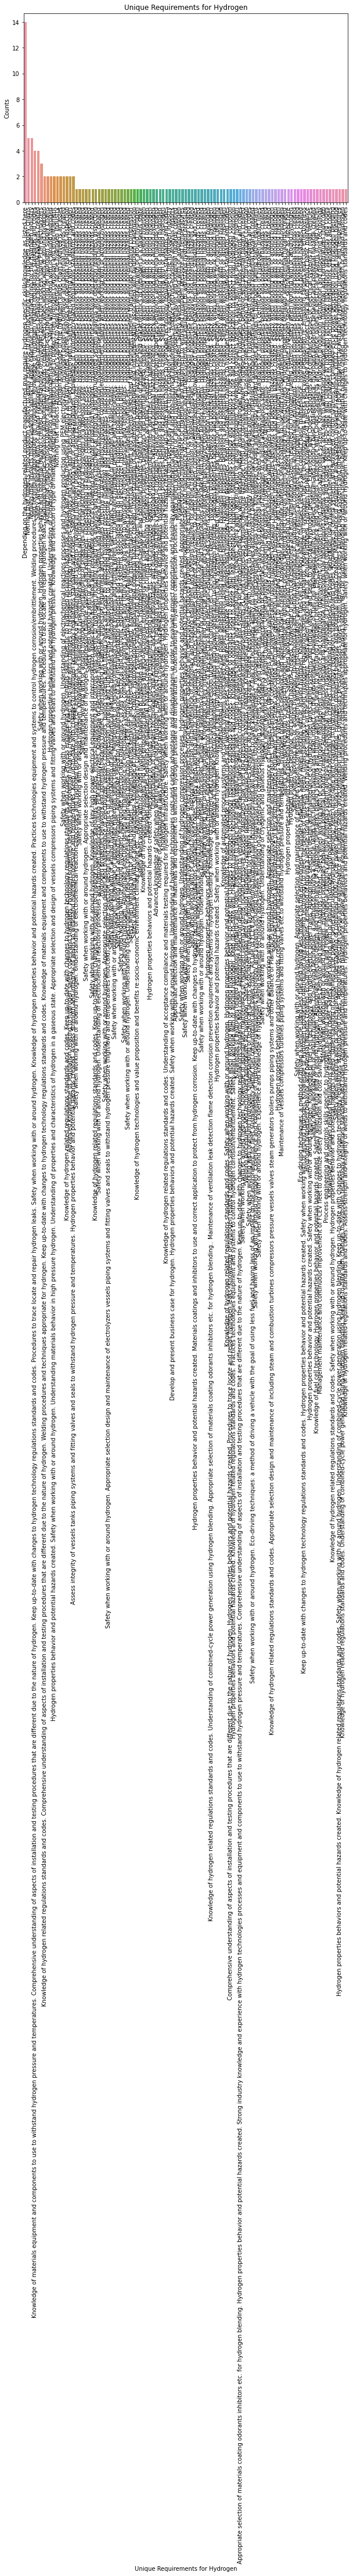

In [22]:
# Bar chart of the value coutns
plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.xlabel('Unique Requirements for Hydrogen')
plt.ylabel('Counts')
plt.title('Unique Requirements for Hydrogen')
plt.show()


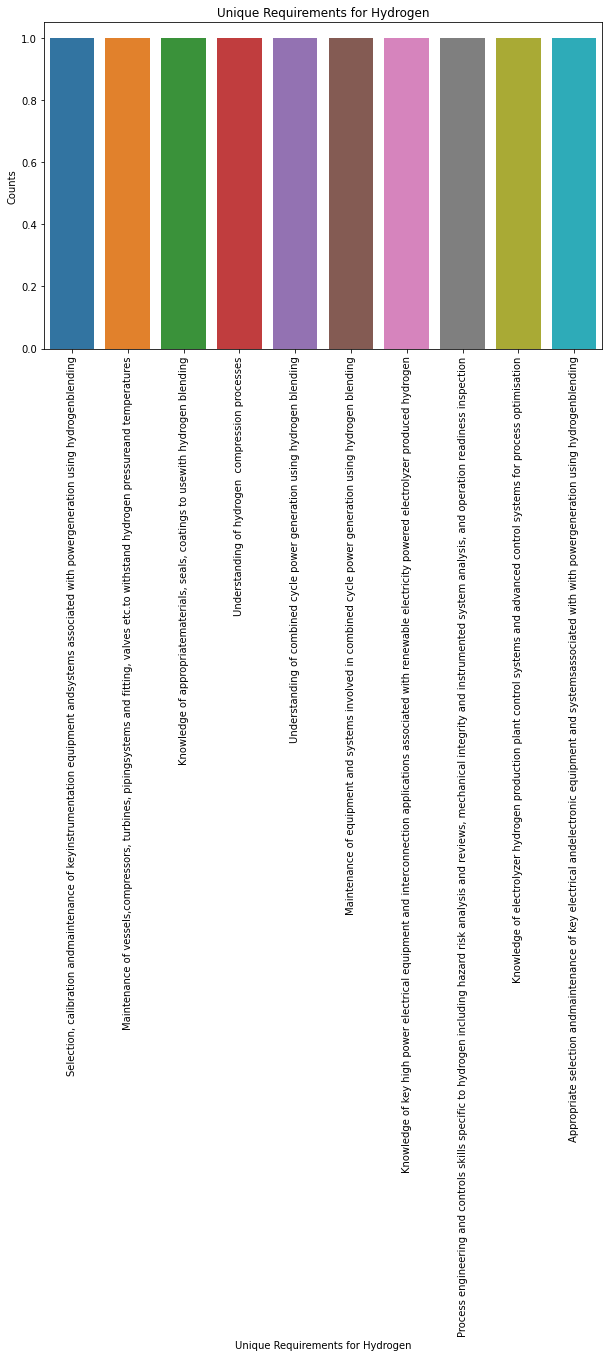

In [ ]:
# Filter counts

counts = df['Unique Requirements for Hydrogen'].value_counts()
counts = counts[counts ==1][:10]

# Bar chart of the value coutns
plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.xlabel('Unique Requirements for Hydrogen')
plt.ylabel('Counts')
plt.title('Unique Requirements for Hydrogen')
plt.show()


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Sample text data
texts = df['Unique Requirements for Hydrogen']
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=1)  # Adjust eps and min_samples as needed
dbscan.fit(X)

# Print the clusters
unique_labels = set(dbscan.labels_)
for label in unique_labels:
    cluster_indices = (dbscan.labels_ == label)
    cluster_texts = [texts[i] for i in range(len(texts)) if cluster_indices[i]]
    print(f"Cluster {label}:")
    for text in cluster_texts:
        print(f"- {text}")
    print()

# Silhouette score can't be used for DBSCAN as it doesn't predict clusters


AttributeError: 'list' object has no attribute 'lower'

{0: 100, 1: 99, 4: 40, 9: 25, 10: 22, 49: 13, 12: 12, 48: 12, 3: 9, 14: 7, 13: 6, 20: 6, 15: 5}


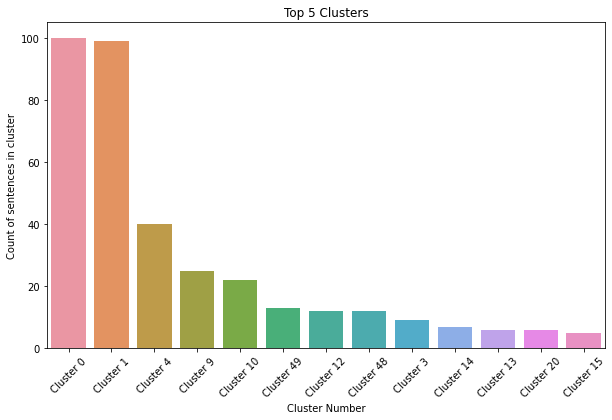

In [30]:
# sort the clusters by the number of sentences

# Find the 5 clutsers with the most sentences
from collections import Counter
cluster_counts = Counter(dbscan.labels_)

# remove all clusters with less than 10 sentences
cluster_counts = {k: v for k, v in cluster_counts.items() if v >= 5}
cluster_counts

# Sort cluster counts by value
cluster_counts = {k: v for k, v in sorted(cluster_counts.items(), key=lambda item: item[1], reverse=True)}

print(cluster_counts)

x_axis = [f'Cluster {str(num)}' for num in cluster_counts.keys()]

# plot the clusters
plt.figure(figsize=(10,6))
sns.barplot(x=x_axis,
             y=list(cluster_counts.values()))
plt.xlabel('Cluster Number')
plt.xticks(rotation=45)
plt.ylabel('Count of sentences in cluster')
plt.title('Top 5 Clusters')
plt.show()


In [29]:
# summarize the clusters 
cluster_summaries = {}
for cluster in cluster_counts.keys():
    cluster_indices = (dbscan.labels_ == cluster)
    cluster_texts = [texts[i] for i in range(len(texts)) if cluster_indices[i]]
    cluster_summaries[cluster] = cluster_texts


# print the summaries
for cluster, texts in cluster_summaries.items():
    print(f"Cluster {cluster}:")
    for text in texts:
        print(f"- {text}")
    print()
    

Cluster 0:
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potential hazards created
- Hydrogen properties, behaviour and potenti

In [41]:
cluster_repeats = {}
print(cluster_summaries[4])
print(len(cluster_summaries[4]))
counts = Counter(cluster_summaries[4])

sorted_dict = dict(sorted(counts.items(), key=lambda item: item[1]))

print(sorted_dict)

for i in sorted_dict:
    print( sorted_dict[i], i)

['Knowledge of key high power electrical equipment associated with electrolyzer produced hydrogen', 'Knowledge of key instrumentation and electrical equipment and systems associated with electrolyzer produced hydrogen', 'Appropriate selection, design and maintenance of related production equipment, materials, coatings, etc.', 'Appropriate selection, design and maintenance of electrolyzers, vessels, piping systems and fitting, valves and seals to withstand hydrogen pressure (high/low) and temperatures (hot/cold)', 'Appropriate selection, design and maintenance of combustion, compression, pumping and turbine systems and equipment to withstand hydrogen pressure (high/low) and temperatures (hot/cold)', 'Appropriate selection, design and maintenance of electrolyzers, vessels, compressors, piping systems and fitting, valves and seals to withstand hydrogen pressure (high/low) and temperatures (hot/cold)', 'Knowledge of key high power electrical equipment and interconnection applications assoc

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

cluster_4 = [
' Knowledge of key high power electrical equipment associated with electrolyzer produced hydrogen ' ,
 ' Knowledge of key instrumentation and electrical equipment and systems associated with electrolyzer produced hydrogen ' ,
 ' Appropriate selection, design and maintenance of related production equipment, materials, coatings, etc. ' ,
 ' Appropriate selection, design and maintenance of electrolyzers, vessels, piping systems and fitting, valves and seals to withstand hydrogen pressure (high/low) and temperatures (hot/cold) ' ,       
 ' Appropriate selection, design and maintenance of combustion, compression, pumping and turbine systems and equipment to withstand hydrogen pressure (high/low) and temperatures (hot/cold) ' ,
 ' Appropriate selection, design and maintenance of electrolyzers, vessels, compressors, piping systems and fitting, valves and seals to withstand hydrogen pressure (high/low) and temperatures (hot/cold) ' ,
 ' Knowledge of key high power electrical equipment and interconnection applications associated with renewable electricity powered electrolyzer produced hydrogen ' ,
 ' Appropriate selection, design and maintenance of electrolyzers, vessels, compressors, piping systems and fitting, valves and seals to withstand hydrogen pressure and temperatures ' ,
 ' Appropriate selection and maintenance of key electrical and electronic equipment and systems associated with an electrolyzer hydrogen production plant ' ,
 ' Appropriate selection and maintenance of key instrumentation equipment and systems associated with an electrolyzer hydrogen production plant ' ,
 ' Maintenance of vessels, compressors, piping systems and fitting, valves etc. to withstand hydrogen pressure and temperatures ' ,
 '  Appropriate selection, design and maintenance of hydrogen compression, turbine systems and equipment ' ,
 '  Knowledge of key instrumentation and electrical equipment and systems associated with hydrogen pipeline transmission including compression ' ,
 '  Understanding of measurement equipment and instrumentation associated with hydrogen transmission ' ,
 '  Appropriate selection and design of vessels, compressors, piping systems and fitting, valves and seals to withstand high hydrogen pressure ' ,
 '  Appropriate selection and design of vessels, compressors, piping systems and fitting, valves and seals to withstand high hydrogen pressure ' ,
 '  Appropriate selection and maintenance of electrical equipment and instrumentation systems required for pipeline transmission of gaseous hydrogen ' ,
 '  Appropriate selection and maintenance of stationary and rotating equipment and systems required for pipeline transmission of gaseous hydrogen ' ,
 '  Appropriate selection and maintenance of compression and turbine systems and equipment to withstand hydrogen pressure ' ,
 '  Appropriate selection and maintenance of materials and equipment to withstand hydrogen pressure and temperatures ' ,
 ' Appropriate selection and  maintenance of materials and  equipment to withstand hydrogen  pressure and temperatures ' ,
 '  Appropriate selection, design and maintenance of hydrogen fuel tanks, piping systems and fitting, valves and seals to withstand hydrogen pressure (high/low) and temperatures (hot/cold) ' ,
 '  Appropriate selection, design and maintenance of hydrogen fuel tanks, piping systems and fitting, valves and seals to withstand hydrogen pressure ' ,
 '  Appropriate selection, design and maintenance of hydrogen fuel tanks, piping systems and fitting, valves and seals to withstand hydrogen pressure ' ,
 ' Knowledge of electrical  equipment and instrumentation  systems required for hydrogen  fueling systems ' ,
 '  Design and selection of compression systems for hydrogen pressure and temperatures associated with hydrogen fueling system ' ,
 ' Design and selection of  pressure vessels, piping  systems and fitting, valves and  seals, coatings and insulation  to withstand hydrogen pressure  and temperatures associated  with hydrogen fueling system ' ,
 '  Appropriate selection and maintenance of pressure vessels, piping systems and fitting, valves and seals, coatings and insulation associated with hydrogen fueling system ' ,
 '  Appropriate selection and maintenance of pressure vessels, compression systems and related instrumentation and controls equipment and systems associated with hydrogen fueling system ' ,
 ' Strong industry knowledge and experience with hydrogen technologies, processes and equipment and components to use to withstand hydrogen pressure and temperatures ' ,
 ' Appropriate selection of materials, coatings, odorants, inhibitors, etc. for hydrogen blending ' ,
 ' Knowledge of materials, equipment and components to use to withstand hydrogen pressure and temperatures ' ,
 ' Knowledge of materials, equipmentand components to use to withstandhydrogen pressure and temperatures ' ,
 ' Appropriate selection of materials,coatings, odorants, inhibitors, etc. forhydrogen blending. ' ,
 ' Maintenance of vessels,compressors, turbines, pipingsystems and fitting, valves etc.to withstand hydrogen pressureand temperatures ' ,
 ' Assess integrity of vessels, tanks, piping systems and fitting, valves and seals to withstand hydrogen pressure and temperatures ' ,
 ' Assess strength and integrity of welds to withstand hydrogen pressure and temperatures ' ,
 ' Assess integrity of vessels, tanks, piping systems and fitting, valves and seals to withstand hydrogen pressure and temperatures ' ,
 ' Assess strength and integrity of welds to withstand hydrogen pressure and temperatures ' ,
 ' Assess strength and integrity ofwelds to withstand hydrogenpressure and temperatures ' 
]

vectorizer = TfidfVectorizer()
cluster_4_vectors = vectorizer.fit_transform(cluster_4)

# DBSCAN clustering
dbscan_4 = DBSCAN(eps=.85, min_samples=1)  # Adjust eps and min_samples as needed
dbscan_4.fit(cluster_4_vectors)

# Print the clusters
unique_labels = set(dbscan_4.labels_)
for label in unique_labels:
    cluster_indices = (dbscan_4.labels_ == label)
    cluster_texts = [cluster_4[i] for i in range(len(cluster_4)) if cluster_indices[i]]
    print(f"Cluster {label}:")
    for text in cluster_texts:
        print(f"- {text}")
    print()










Cluster 0:
-  Knowledge of key high power electrical equipment associated with electrolyzer produced hydrogen 
-  Knowledge of key instrumentation and electrical equipment and systems associated with electrolyzer produced hydrogen 
-  Knowledge of key high power electrical equipment and interconnection applications associated with renewable electricity powered electrolyzer produced hydrogen 

Cluster 1:
-  Appropriate selection, design and maintenance of related production equipment, materials, coatings, etc. 

Cluster 2:
-  Appropriate selection, design and maintenance of electrolyzers, vessels, piping systems and fitting, valves and seals to withstand hydrogen pressure (high/low) and temperatures (hot/cold) 
-  Appropriate selection, design and maintenance of combustion, compression, pumping and turbine systems and equipment to withstand hydrogen pressure (high/low) and temperatures (hot/cold) 
-  Appropriate selection, design and maintenance of electrolyzers, vessels, compressors, p